# Сортировка выбором

In [2]:
def selection_sort(a):
    for i in range(len(a)):
        k = i
        for j in range(i + 1, len(a)):
            if a[j] < a[k]:
                k = j
        a[i], a[k] = a[k], a[i]
        
a = [7, 8, 3, 1, 9, 4, 6, 4]
selection_sort(a)
print(a)

[1, 3, 4, 4, 6, 7, 8, 9]


## Время работы $O(n^2)$

Попробуем ускорить, воспользуемся min-кучей

In [25]:
class MinHeap:
    def __init__(self):
        self.heap = []
        
    def insert(self, x):
        self.heap.append(x)
        i = len(self.heap) - 1
        self.sift_up(i)
        
    def sift_up(self, i):
        if i == 0:
            return
        if self.heap[i] < self.heap[(i - 1) // 2]:
            self.heap[(i - 1) // 2], self.heap[i] = self.heap[i], self.heap[(i - 1) // 2]
            self.sift_up((i - 1) // 2)
            
    def sift_down(self, i):
        child1, child2 = float('inf'), float('inf')
    
        if 2*i + 1 >= len(self.heap) and 2*i + 2 >= len(self.heap):
            return

        if 2*i + 1 < len(self.heap):
            child1 = self.heap[2*i + 1]

        if 2*i + 2 < len(self.heap):
            child2 = self.heap[2*i + 2]

        if self.heap[i] > child1 or (self.heap[i] > child2 and child2 != float('inf')):
            if child1 < child2 or child2 == float('inf'):
                self.heap[i], self.heap[2*i + 1] = self.heap[2*i + 1], self.heap[i]
                self.sift_down(2*i + 1)
            else:
                self.heap[i], self.heap[2*i + 2] = self.heap[2*i + 2], self.heap[i]
                self.sift_down(2*i + 2)
                
    def extract_min(self):
        res = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.sift_down(0)
        return res

    
def heap_sort(a):
    
    heap = MinHeap()

    for el in a:
        heap.insert(el)
    
    a_sorted = []

    for i in range(len(a)):
        a_sorted.append(heap.extract_min())
        
    return a_sorted


a = [7, 8, 3, 1, 9, 4, 6, 4]
a_sorted = heap_sort(a)
print(a_sorted)

[1, 3, 4, 4, 6, 7, 8, 9]


## Время работы $O(n \log n)$

Но тут мы использовали дополнительную память, можно ли это побороть?

Будем использовать массив как кучу.

# Сортировка кучей на месте

In [26]:
def build_max_heap(a):
    for i in range((len(a) - 1) // 2, -1, -1):
        swift_down(a, i, len(a))


def sift_down(a, i, size):
    child1, child2 = float('inf'), float('inf')
    
    if 2*i + 1 >= size and 2*i + 2 >= size:
            return

    if 2*i + 1 < size:
        child1 = a[2*i + 1]

    if 2*i + 2 < size:
        child2 = a[2*i + 2]

    if a[i] < child1 or (a[i] < child2 and child2 != float('inf')):
        if child1 > child2 or child2 == float('inf'):
            a[i], a[2*i + 1] = a[2*i + 1], a[i]
            sift_down(a, 2*i + 1, size)
        else:
            a[i], a[2*i + 2] = a[2*i + 2], a[i]
            sift_down(a, 2*i + 2, size)
    

def heap_sort(a):
    build_max_heap(a)
    size = len(a) - 1
    for i in range(len(a) - 1, -1, -1):
        a[0], a[size] = a[size], a[0]
        size -= 1
        sift_down(a, 0, size + 1)
        
        
a = [7, 8, 3, 1, 9, 4, 6, 4]
heap_sort(a)
print(a)

[1, 3, 4, 4, 6, 7, 8, 9]


__Замечание__. Переменная $size$ используется внутри $swift\_down$: куча располагается в подмассиве $A[0,\ldots, size]$

## Построение кучи

У листьев все хорошо. Свойство кучи может быть нарушено только у внутренних вершин. Поэтому идем только по внутренним вершинам. Когда подходим к какой-то вершине, в ее дереве уже все хорошо, свойство кучи может быть нарушено только в самой вершине.

## Время работы построения кучи

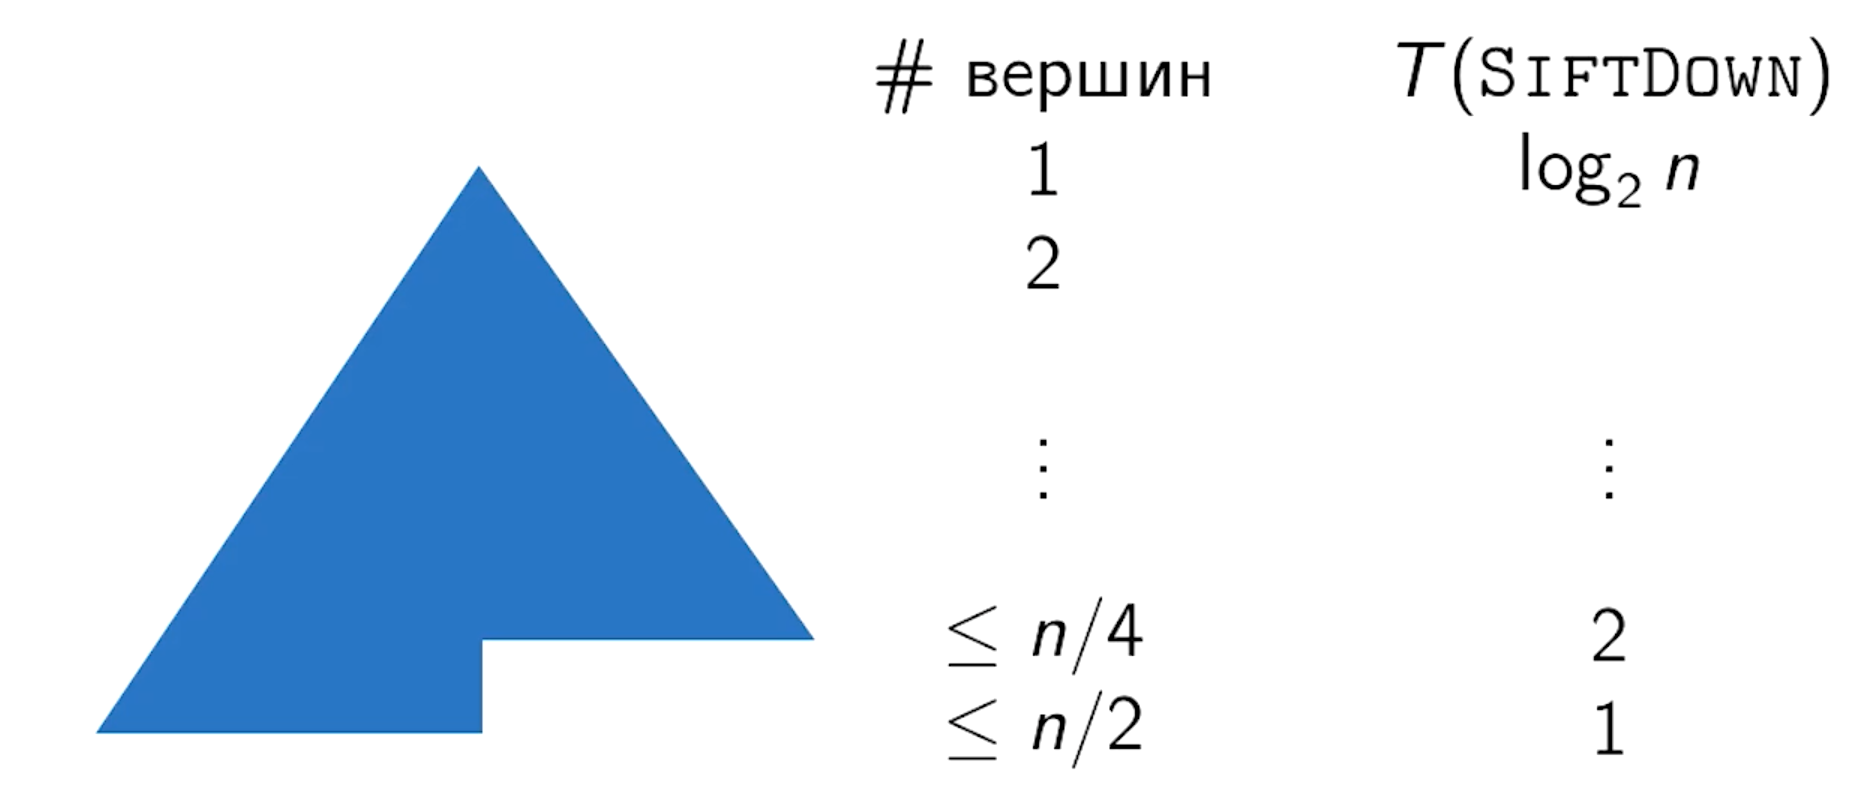

In [27]:
from IPython.display import Image
Image(filename='images/Сортировка кучей/heap_1.png')

$T(build\_heap) \leq \frac{n}{2}\cdot 1 + \frac{n}{4}\cdot 2 + \frac{n}{8}\cdot 3 + \dots \leq n \cdot \sum \limits_{i=1}^{\infty} \frac{i}{2^i} = 2n$

## Оценка суммы

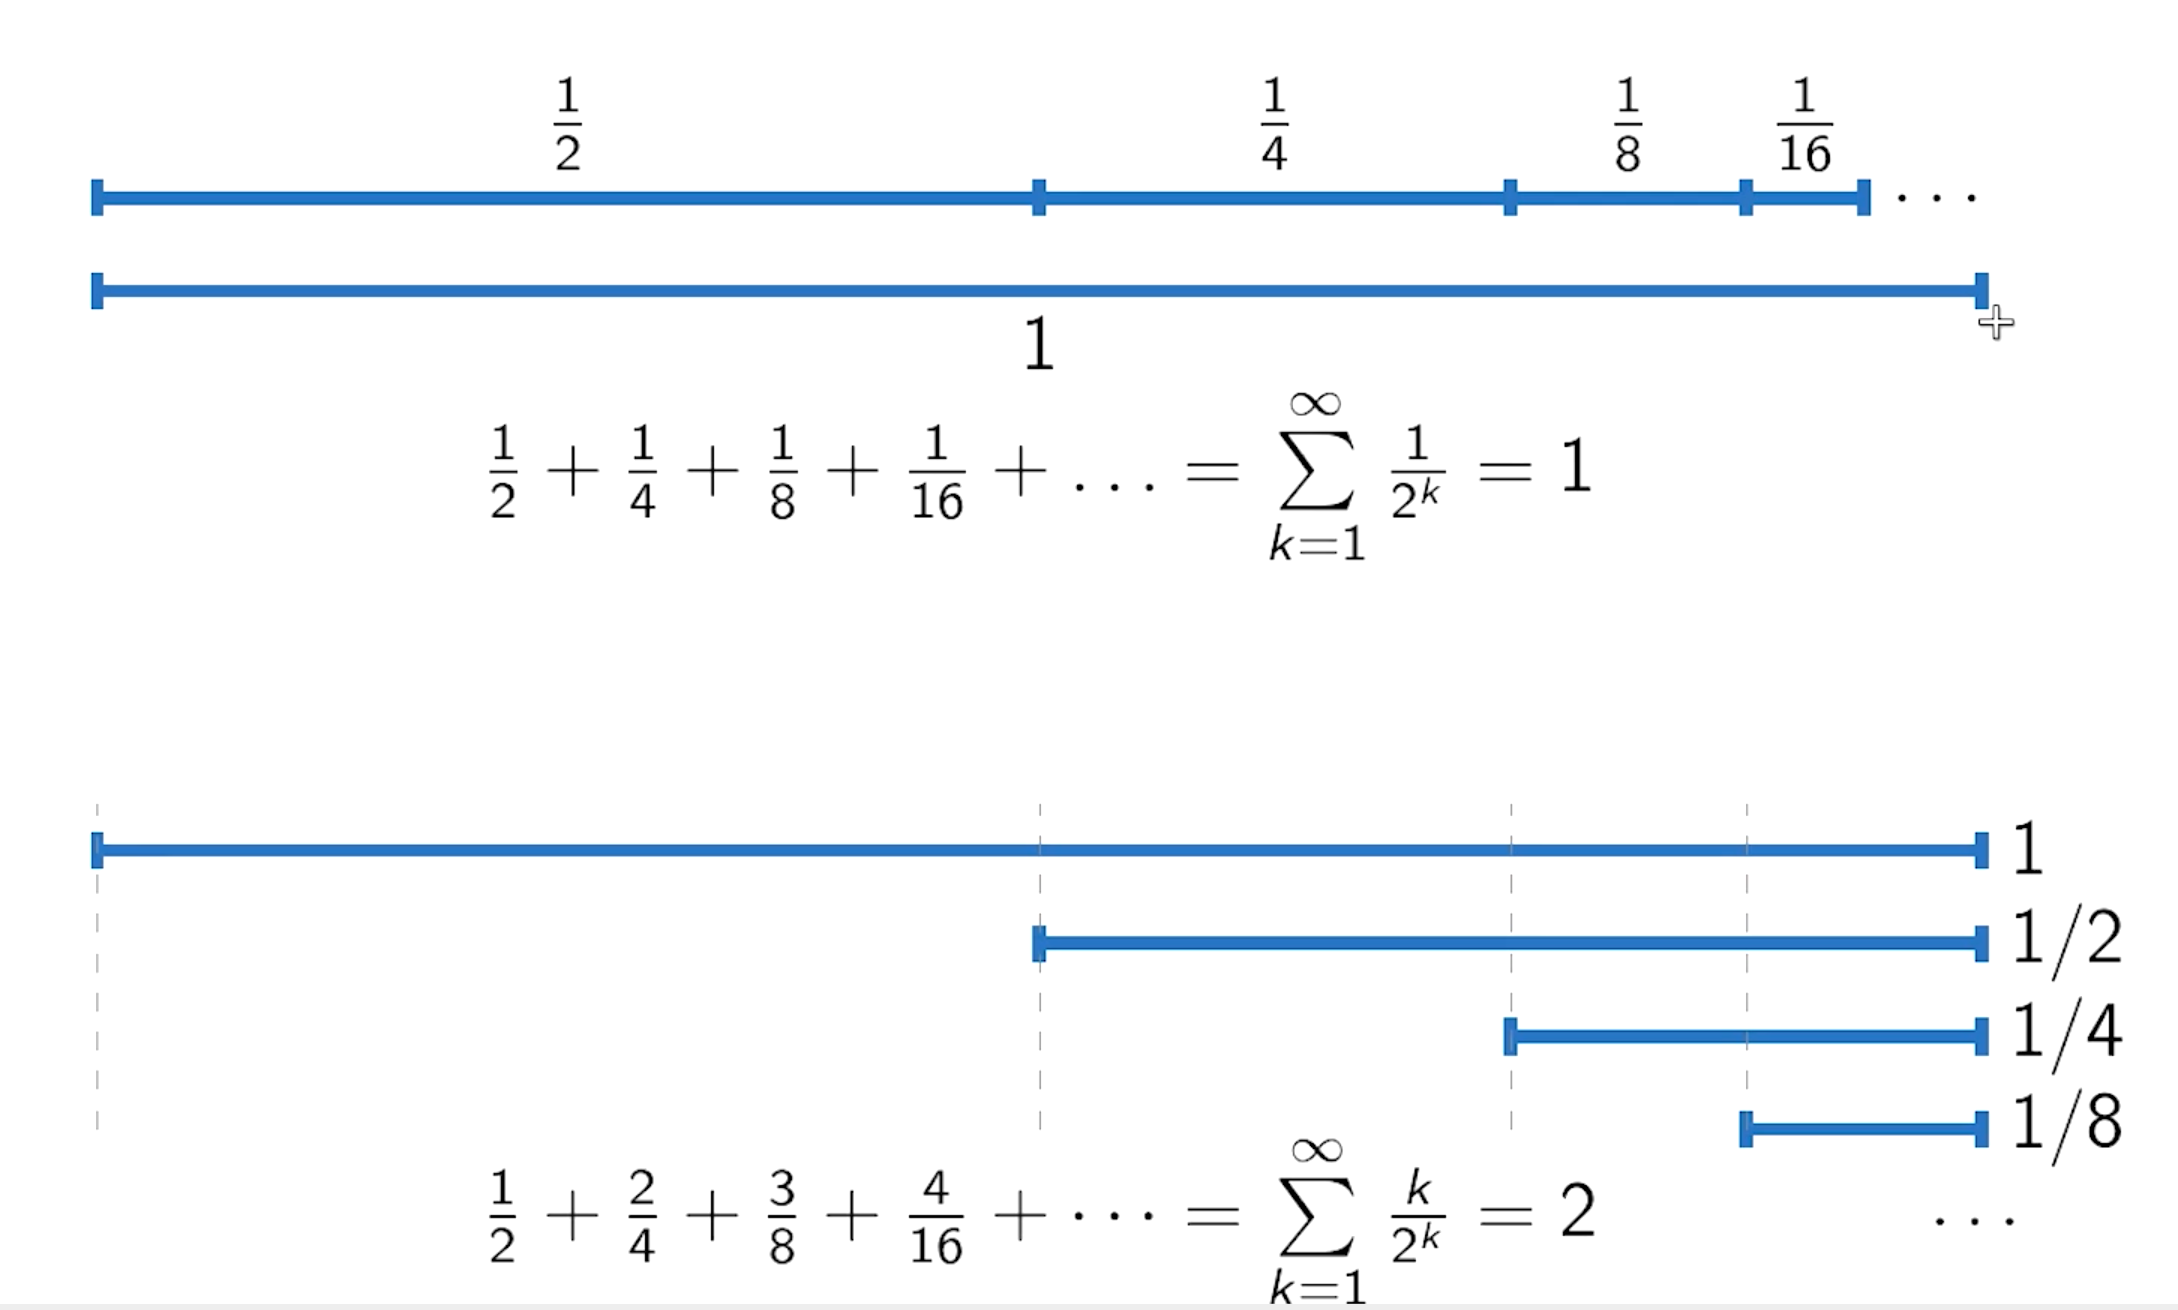

In [28]:
Image(filename='images/Сортировка кучей/heap_2.png')

# Заключение

- Время работы сортировки кучей: $O(n\log n)$.
- Время работы построения кучи: $O(n)$.
- Сортирует на месте.

# Задача: частичная сортировка

Постройте алгоритм, который по данному массиву $A[1\ldots n]$ выводит его минимальные $\sqrt{n}$ элементов в порядке возрастания за время $O(n)$.

__Решение__.

Построить min-кучу. В цикле от 1 до $\sqrt{n}$ доставать минимальный элемент.

$T(n) = O(n) + O(\sqrt{n} \cdot \log \sqrt{n})= O(n)$

# Задача: попарные суммы в возрастающем порядке

Даны массивы $A[1\ldots n]$ и $B[1\ldots n]$. Мы хотим вывести все $n^2$ сумм вида $A[i]+B[j]$ в возрастающем порядке. Наивный способ — создать массив, содержащий все такие суммы, и отсортировать его. Соответствующий алгоритм имеет время работы $O(n^2 \log n)$ и использует $O(n^2)$ памяти. Приведите алгоритм с таким же временем работы, который использует линейную память.

__Решение__.

Сортируем $A$ и $B$. Для каждого $a \in A$ будем хранить позицию $i_a$ в $B$ такую, что все пары $(a, B[i]),i \geq i_a$ мы ещё не выдали. (Очевидно, что пары с элементом $a$ мы будем выдавать в порядке увеличения элемента из $B$). Храним это всё в мин-куче, где ключ это $a+B[i_a]$. Т.е. в куче можно хранить кортежи вида $(a+B[i_a], a, i_a)$. Тогда вытаскивая элемент $(a+B[i_a], a, i_a)$, выводим $a+B[i_a]$, увеличиваем $i_a$ до $i_a+1$, и если он не вышел за рамки массива $B$, кладем в кучу $(a+B[i_a], a, i_a + 1)$.